<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5_%EB%8B%A4%EB%A5%B8%EB%B2%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

boston = fetch_openml(name='boston')

In [2]:
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [3]:
bostonDF = pd.DataFrame(boston.data,columns = boston.feature_names)

In [4]:
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
bostonDF.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [6]:
bostonDF.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
a = ['a','b','c']

for temp1, temp2 in enumerate(a):
    print(temp1)
    print(temp2)
    print('===================')

0
a
1
b
2
c


In [9]:
bostonDF['RAD'] = bostonDF['RAD'].astype('int')
bostonDF['CHAS'] = bostonDF['CHAS'].astype('int')

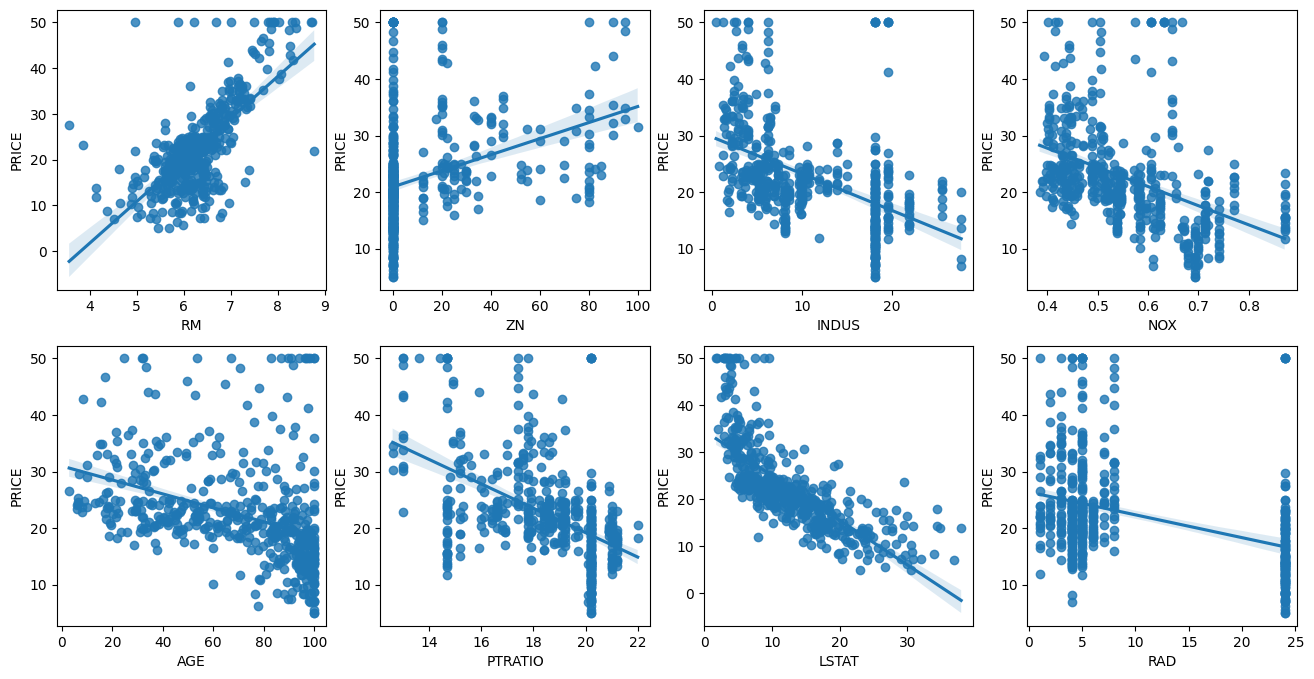

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4

    sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.3,random_state=156)

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 210 to 178
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-null    float64
 3   CHAS     152 non-null    int64  
 4   NOX      152 non-null    float64
 5   RM       152 non-null    float64
 6   AGE      152 non-null    float64
 7   DIS      152 non-null    float64
 8   RAD      152 non-null    int64  
 9   TAX      152 non-null    float64
 10  PTRATIO  152 non-null    float64
 11  B        152 non-null    float64
 12  LSTAT    152 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 16.6 KB


In [15]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : ',mse)
print('RMSE : ',rmse)
print('R2SCORE : ',r2_score(y_test,y_preds))

MSE :  17.296915907901962
RMSE :  4.158956107955692
R2SCORE :  0.7572263323138948


In [16]:
lr.intercept_

40.995595172164826

In [17]:
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [18]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [19]:
from sklearn.model_selection import cross_val_score

lr_c = LinearRegression()

neg_mse_score = cross_val_score(lr_c,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmse_scores)

print('neg_mse_score : ' , np.round(neg_mse_score,2))
print('rmse_scores : ' , np.round(rmse_scores,2))
print('avg_rmse : ',avg_rmse)


neg_mse_score :  [-12.46 -26.05 -33.07 -80.76 -33.31]
rmse_scores :  [3.53 5.1  5.75 8.99 5.77]
avg_rmse :  5.828658946215802


In [20]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [21]:
X_train,X_test,y_train,y_test = train_test_split(perch_length.reshape(-1,1), perch_weight.reshape(-1,1), random_state=42)

In [22]:
X_train

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [23]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr.predict([[30]])

array([[461.49570396]])

In [25]:
lr.coef_

array([[39.01714496]])

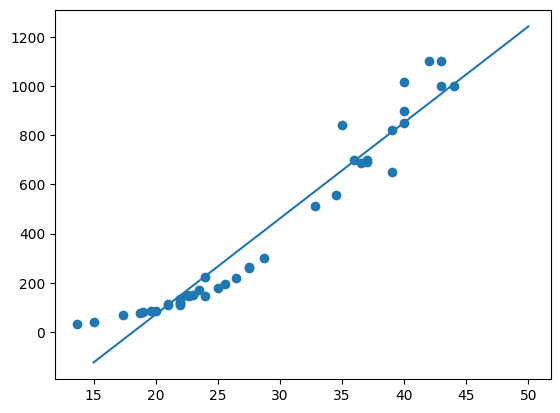

In [26]:
plt.scatter(X_train.reshape(-1),y_train.reshape(-1))
plt.plot([15,50],[15*lr.coef_[0][0]+lr.intercept_[0], 50*lr.coef_[0][0]+lr.intercept_[0]])

In [27]:
X_train

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=False)
poly.fit(X_train)
poly_train = poly.transform(X_train)
poly_train

array([[  19.6 ,  384.16],
       [  22.  ,  484.  ],
       [  18.7 ,  349.69],
       [  17.4 ,  302.76],
       [  36.  , 1296.  ],
       [  25.  ,  625.  ],
       [  40.  , 1600.  ],
       [  39.  , 1521.  ],
       [  43.  , 1849.  ],
       [  22.  ,  484.  ],
       [  20.  ,  400.  ],
       [  22.  ,  484.  ],
       [  24.  ,  576.  ],
       [  27.5 ,  756.25],
       [  43.  , 1849.  ],
       [  40.  , 1600.  ],
       [  24.  ,  576.  ],
       [  21.  ,  441.  ],
       [  27.5 ,  756.25],
       [  40.  , 1600.  ],
       [  32.8 , 1075.84],
       [  26.5 ,  702.25],
       [  36.5 , 1332.25],
       [  13.7 ,  187.69],
       [  22.7 ,  515.29],
       [  15.  ,  225.  ],
       [  37.  , 1369.  ],
       [  35.  , 1225.  ],
       [  28.7 ,  823.69],
       [  23.5 ,  552.25],
       [  39.  , 1521.  ],
       [  21.  ,  441.  ],
       [  23.  ,  529.  ],
       [  22.  ,  484.  ],
       [  44.  , 1936.  ],
       [  22.5 ,  506.25],
       [  19.  ,  361.  ],
 

In [29]:
lr_1 = LinearRegression()
lr_1.fit(poly_train,y_train)


LinearRegression()

In [30]:
lr_1.predict([[12,12*12]])

array([[3.41893479]])

In [31]:
print(lr_1.coef_ , lr_1.intercept_)

[[-21.55792498   1.01433211]] [116.05021078]


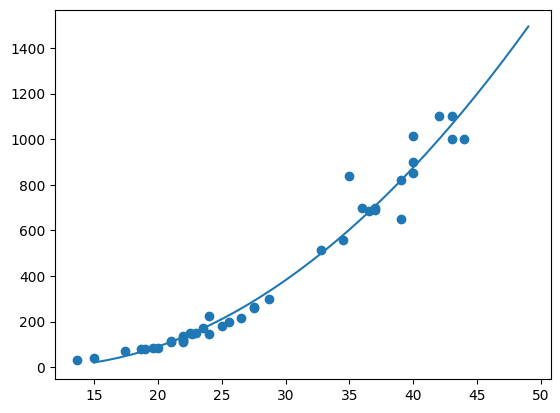

In [32]:
point = np.arange(15,50)
plt.scatter(X_train.reshape(-1),y_train.reshape(-1))
plt.plot(point, 1.014*point**2 + -21.55*point + 116.05)

## Regularized Linear Models – Ridge, Lasso
### Regularized Linear Model - Ridge Regression(릿지 회귀)

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [35]:
#릿지회귀 (L2규제)
lr_r = Ridge(alpha = 2)

lr_r.fit(X_train, y_train)
lr_r.score(X_test, y_test)

0.8250757398756992

### Regularized Linear Model - Lasso Regression(라쏘 회귀)

In [38]:
from sklearn.linear_model import Lasso
lr_l = Lasso(alpha = 2)
lr_l.fit(X_train, y_train)
lr_l.score(X_test, y_test)

0.8251007922897244

### 로지스틱 회귀

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [40]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                    test_size = 0.3, random_state = 0)

In [43]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [44]:
lr_clf.score(X_test, y_test)

0.9766081871345029

## 회귀 트리
### RandomForestRegressor

In [54]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 보스턴 데이터 세트 로드
boston = fetch_openml(name='boston')
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [55]:
y_target = bostonDF['PRICE']
#X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)
x_data = bostonDF.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.3)

In [57]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
neg_mse_scores

array([-12.20344963, -10.92354231,  -6.33243151, -11.21648306,
        -8.51862706])

In [61]:
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-12.2  -10.92  -6.33 -11.22  -8.52]
 5 교차 검증의 개별 RMSE scores :  [3.49 3.31 2.52 3.35 2.92]
 5 교차 검증의 평균 RMSE : 3.117 


### 광고 매출 예약

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [163]:
data=pd.read_csv('/content/drive/MyDrive/colab_data_file/광고매출예측.csv')
data.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [164]:
#결측치 확인
data.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [165]:
#이상 데이터 확인
data.describe()

,youtube,facebook,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,176.451000,27.916800,36.664800,16.827000
std,103.025084,17.816171,26.134345,6.260948
min,0.840000,0.000000,0.360000,1.920000
25%,89.250000,11.970000,15.300000,12.450000
50%,179.700000,27.480000,30.900000,15.480000
75%,262.590000,43.830000,54.120000,20.880000
max,355.680000,59.520000,136.800000,32.400000


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    200 non-null    float64
 1   facebook   200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [186]:
#컬럼 끼리의 상관관계 확인
data.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.054809,0.056648,0.782224
facebook,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [167]:
data.index.name = 'index'
data

,youtube,facebook,newspaper,sales
index,,,,
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48
...,...,...,...,...
195,45.84,4.44,16.56,9.12
196,113.04,5.88,9.72,11.64
197,212.40,11.16,7.68,15.36


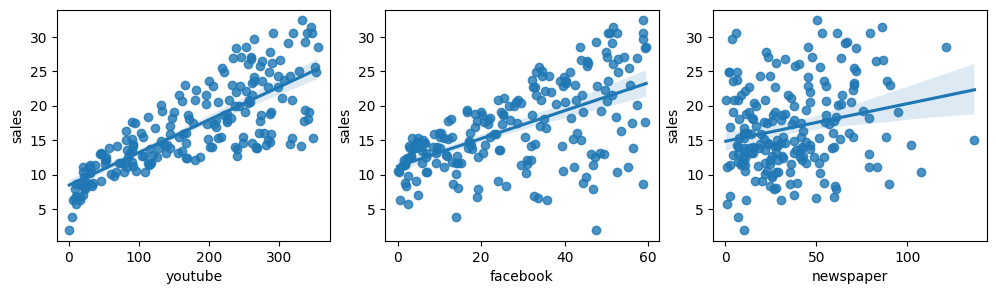

In [168]:
# 1개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x1개의 ax를 가짐.
fig, axs = plt.subplots(figsize = (12, 3), ncols = 3, nrows = 1, squeeze = False)
lm_features = ['youtube','facebook','newspaper']
for i, feature in enumerate(lm_features):
    row = int(i / 3)
    col = i % 3

    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y = 'sales', data = data, ax = axs[row][col])

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [170]:
y_target = data['sales']
X_data = data.drop(['sales'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                    test_size = 0.2, random_state = 100)

In [171]:
# 제일 먼저 선형회귀 먼저 시도
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [172]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 2.496 , RMSE : 1.580
Variance score : 0.918


In [173]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 3.380730162353995
회귀 계수값: [0.  0.2 0. ]


In [174]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

facebook     0.2
youtube      0.0
newspaper    0.0
dtype: float64

In [175]:
#교차 검증
from sklearn.model_selection import cross_val_score

#lr_c 모델 생
lr_c = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함.
neg_mse_scores = cross_val_score(lr_c, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-4.52 -3.49 -2.28 -7.81 -4.02]
 5 folds 의 개별 RMSE scores :  [2.13 1.87 1.51 2.8  2.  ]
 5 folds 의 평균 RMSE : 2.061 


In [176]:
rf = RandomForestRegressor(random_state=100, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_train, y_train, scoring="neg_mean_squared_error", cv = 5)
neg_mse_scores

array([-0.86117191, -0.88164573, -0.99155737, -1.02476687, -2.42500197])

In [177]:
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-0.86 -0.88 -0.99 -1.02 -2.43]
 5 교차 검증의 개별 RMSE scores :  [0.93 0.94 1.   1.01 1.56]
 5 교차 검증의 평균 RMSE : 1.086 


In [178]:
y_target = data['sales']
X_data = data.drop(['sales'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                    test_size = 0.2, random_state = 100)

In [179]:
def get_model_cv_prediction(model, X_data, y_target):
    model.fit(X_train,y_train)
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 10)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(model.__class__.__name__)
    #print("평균 rmse: {0:3f}".format(avg_rmse))
    smallest = rmse_scores[0]
    for i in rmse_scores:
        if i < smallest:
            smallest = i
    print("rmse:",smallest)

In [180]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=100, n_estimators=1000)
get_model_cv_prediction(gb_reg, X_data, y_target)

GradientBoostingRegressor
rmse: 0.5014409745843885


In [181]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=100, max_depth=4)
rf_reg = RandomForestRegressor(random_state=100, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=100, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

DecisionTreeRegressor
rmse: 1.4321758726145428
RandomForestRegressor
rmse: 0.7646149242592998
GradientBoostingRegressor
rmse: 0.5014409745843885
XGBRegressor
rmse: 0.7329930080370797
LGBMRegressor
rmse: 0.7864264530297826


<Axes: >

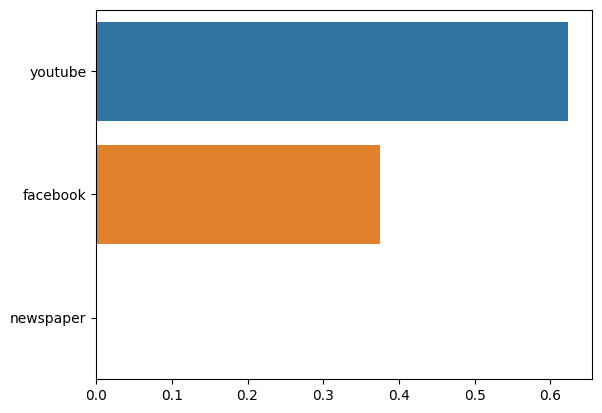

In [182]:
import seaborn as sns
%matplotlib inline

rf_reg = GradientBoostingRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


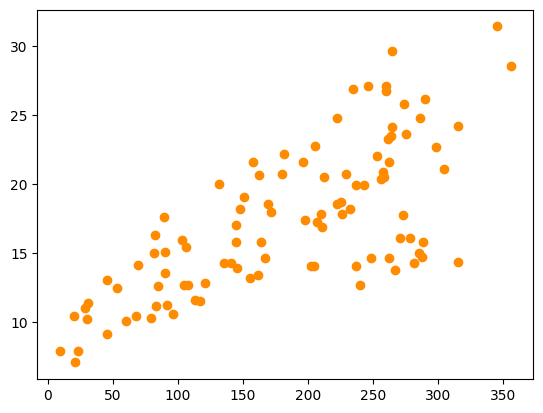

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline

data_sample = data[['youtube','sales']]
data_sample = data_sample.sample(n=100,random_state=100)
print(data_sample.shape)
plt.figure()
plt.scatter(data_sample.youtube , data_sample.sales,c="darkorange")

In [184]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(0, 350, 0.04).reshape(-1, 1)

X_feature = data_sample['youtube'].values.reshape(-1,1)
y_target = data_sample['sales'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

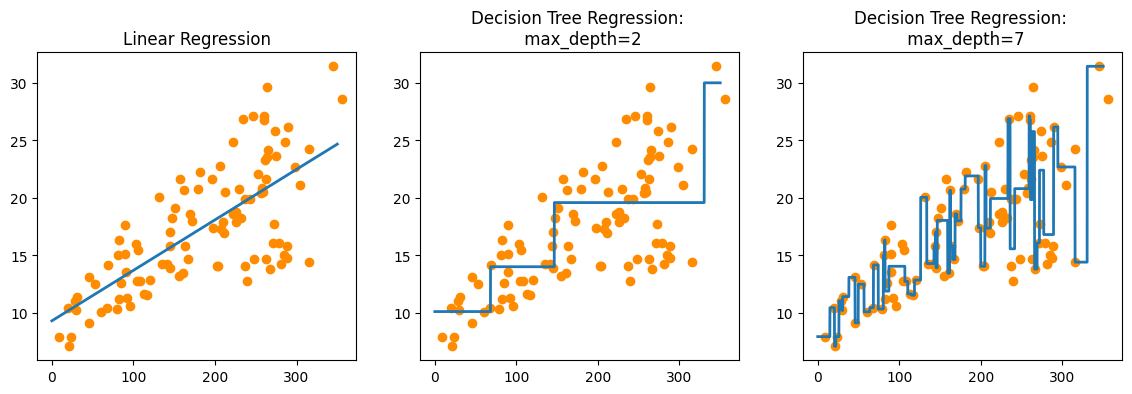

In [185]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(data_sample.youtube, data_sample.sales, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(data_sample.youtube, data_sample.sales, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(data_sample.youtube, data_sample.sales, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)